# 데이터 불러오기

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

data_train = pd.read_csv('./train.csv')
data_test = pd.read_csv('./test.csv')
print(data_train.shape)
data_train.head(5).transpose()

(1253, 10)


,0,1,2,3,4
id,1,2,3,4,5
Gender,M,I,I,M,I
Lenght,0.605,0.43,0.58,0.535,0.31
Diameter,0.47,0.315,0.49,0.405,0.235
Height,0.115,0.095,0.195,0.175,0.09
Whole Weight,1.114,0.378,1.3165,1.2705,0.127
Shucked Weight,0.3925,0.175,0.5305,0.548,0.048
Viscra Weight,0.291,0.08,0.254,0.3265,0.031
Shell Weight,0.31,0.1045,0.41,0.337,0.04
Target,15,8,18,13,6


## feature 설명
- Gender 전복의 성별
- Length 전복의 길이 (껍질?)
- Diameter 전복의 지름
- Height 전복의 높이
- Whole Weight 전복의 전체 무게
- Shucked Weight 전복의 무게 (젖은 상태로 측정)
- Viscra Weight 전복의 내장 무게
- Shell Weight 전복의 껍데기 무게 (건조후 측정)
- Target 나이

오타가 불편하니 바꿔줍시다

In [3]:
data_train.rename(columns = {"Lenght":"Length"}, inplace = True)
data_test.rename(columns = {"Lenght":"Length"}, inplace = True)

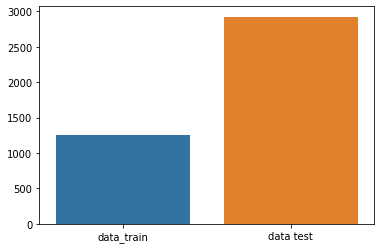

In [4]:
x = ["data_train", "data test"]
y = [data_train.shape[0], data_test.shape[0]]
ax = sns.barplot(x=x, y=y)

이번에도 train셋이 적은 것으로 보입니다.

# 데이터 전처리

우선 feature / target의 연관관계부터 보겠습니다.

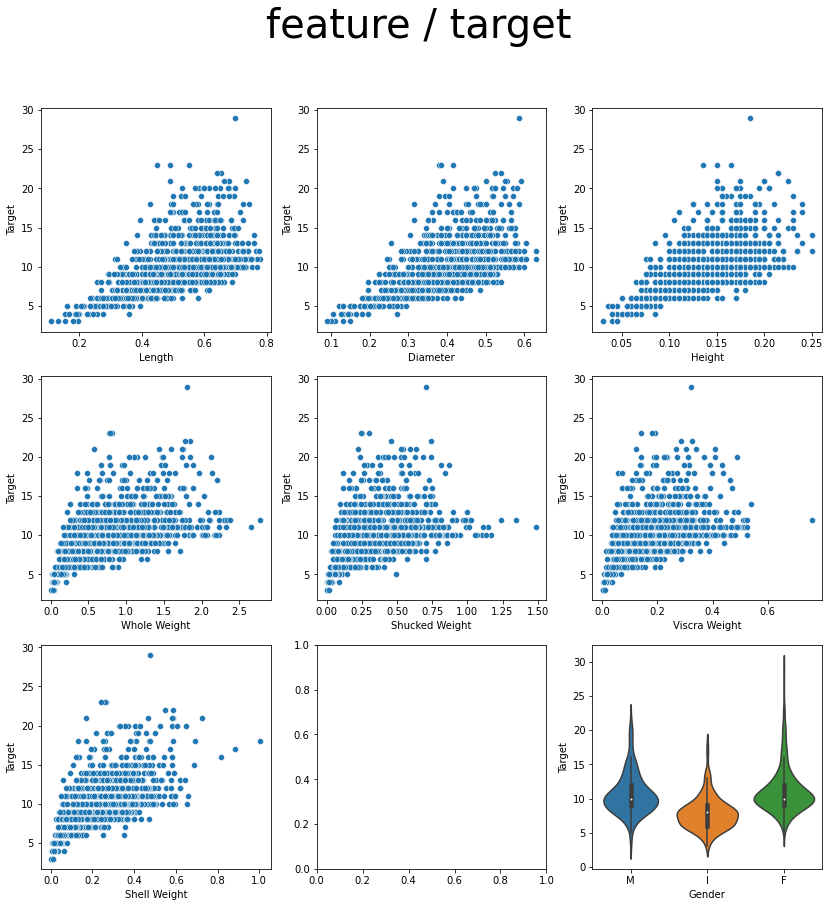

In [3]:
fig, ax = plt.subplots(3, 3, figsize = (14, 14))

plt.suptitle("feature / target", fontsize=40)

feature = ["Length", "Diameter", "Height", "Whole Weight", "Shucked Weight", "Viscra Weight", "Shell Weight", "Gender"]

xvalue = 0
yvalue = 0

for xstr in feature:
    if xstr == "Gender":
        sns.violinplot(x = xstr, y = 'Target', data = data_train)
    else:
        sns.scatterplot(x = xstr, y = 'Target', data = data_train, ax = ax[yvalue][xvalue])
        
    if xvalue == 2:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

모든 numeric feature들이 Target과 비례관계를 가지고 있는 점을 볼 수 있습니다.

또한 Gender에서는 M / F에 비해 I가 낮은 Target 점수를 가지고 있습니다.

여기서 제가 주목한 점은 **scatter plot을 보았을때, 15 이상의 점수에 대해서는 데이터가 적은것으로 보여 적당한 oversampling이 필요하지 않을까 생각하게 되었습니다.**

또한 25 이상인 점이 하나 보여 제거해야겠다고 생각했습니다.

## 이상치 제거

In [4]:
data_train[data_train["Target"]>20]

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
216,217,M,0.675,0.555,0.200,1.4385,0.5450,0.2665,0.465,21
448,449,F,0.680,0.550,0.200,1.5960,0.5250,0.4075,0.585,21
553,554,F,0.450,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
629,630,M,0.655,0.540,0.215,1.8440,0.7425,0.3270,0.585,22
735,736,F,0.640,0.525,0.215,1.7790,0.4535,0.2855,0.550,22
762,763,F,0.700,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
792,793,M,0.735,0.590,0.225,1.7560,0.6370,0.3405,0.580,21
1131,1132,F,0.550,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1140,1141,M,0.490,0.390,0.150,0.5730,0.2250,0.1240,0.170,21
1172,1173,F,0.665,0.500,0.175,1.7420,0.5950,0.3025,0.725,21


In [5]:
data_train = data_train.drop(index = [762], axis = 0)

우선 혼자서 29의 높은 점수를 가진 열을 이상치라고 판단하고 제거하였습니다.

In [6]:
data_train[data_train["Whole Weight"] < data_train["Shucked Weight"] + data_train["Shell Weight"]]

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
47,48,I,0.380,0.275,0.095,0.1375,0.0860,0.0585,0.0605,7
382,383,I,0.455,0.330,0.100,0.3720,0.3580,0.0775,0.1100,8
435,436,I,0.475,0.365,0.100,0.1315,0.2025,0.0875,0.1230,7
847,848,I,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4
1078,1079,I,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5


In [7]:
data_train = data_train.drop(index = [47, 382, 435, 847, 1078], axis = 0)

그다음 전복의 전체 무게가 전복의 무게 + 껍질의 무게보다 작은 경우가 있는지 검사했는데 존재하고 있었습니다.

따라서 전복을 분리하고 나니 무게가 늘어났다는것은 이상하기 때문에 이상치라고 판단하고 제거했습니다.

In [8]:
data_train[data_train["Shucked Weight"] < data_train["Viscra Weight"]]

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
465,466,M,0.415,0.315,0.125,0.388,0.068,0.09,0.125,12


In [9]:
data_train = data_train.drop(index = [465], axis = 0)

이후 혹시나 해서 전복의 무게가 전복의 내장 무게보다 작은 경우가 있는지 검사했는데 존재하고 있었습니다.

따라서 전복에서 내장을 꺼냈는데, 내장이 전복보다 무겁다는 것은 이상하기 때문에 이상치라고 판단하고 제거했습니다.

In [10]:
data_train[data_train["Length"] < data_train["Diameter"]]

,id,Gender,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target


다행히도 길이보다 지름이 더 큰 경우는 존재하지 않고 있습니다.

## 새로운 feature을 통한 전처리

전체 무게에서 전복의 무게와 껍질의 무게를 빼게 되면 남는 값이 있는데, 이는 전복이 머금고 있었던 물이라고 합니다.

따라서 전복이 머금고 있던 물을 Shell Water라고 이름짓고, Whole Weight에서 빼주어 학습시 전복이 랜덤하게 머금던 물의 영향을 받지 않도록 했습니다.

또한 Shell Water 변수는 전복의 나이와 연관성이 없다고 판단해서 다시 제거했습니다

In [11]:
data_train["Shell Water"] = data_train["Whole Weight"] - (data_train["Shucked Weight"] + data_train["Shell Weight"])
data_train["Whole Weight"] = data_train["Whole Weight"] - data_train["Shell Water"]
data_train = data_train.drop(columns = ['Shell Water', 'id'], axis = 1)

data_test["Shell Water"] = data_test["Whole Weight"] - (data_test["Shucked Weight"] + data_test["Shell Weight"])
data_test["Whole Weight"] = data_test["Whole Weight"] - data_test["Shell Water"]
data_test = data_test.drop(columns = ['Shell Water', 'id'], axis = 1)

## Target Oversampling

<AxesSubplot:xlabel='Target', ylabel='Count'>

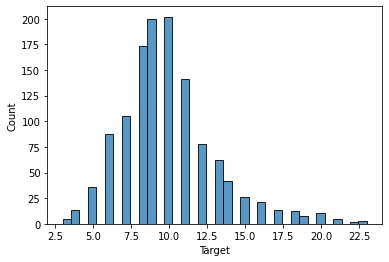

In [12]:
sns.histplot(data_train['Target'])

실제로 Target의 분포를 보니 10을 기준으로 종모양의 분포가 나타나고 있는 것으로 보입니다.

15 이상 Target에 대한 샘플이 충분하지 않아, oversampling이 필요한 것으로 보입니다.

가설을 뒷받침하려고 샘플 모델을 돌려본 후 결과를 보았는데, 15 이상의 큰 Target에 대해서 정확하게 맞추지 못하는 모습을 보였습니다.

In [13]:
data_train_T=data_train['Target']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 10:
        target.append(1)
    elif data_train_T.iloc[i] < 15:
        target.append(2)
    else:
        target.append(3)
        
data_train["Range"] = target

<AxesSubplot:xlabel='Range', ylabel='count'>

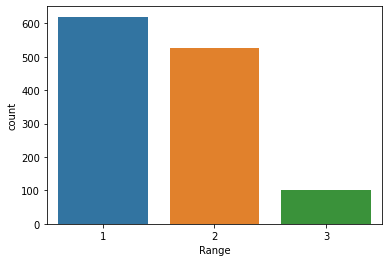

In [14]:
sns.countplot(x = data_train["Range"])

## 가중치 값 증가

우선은 간단하게 Copy Over Sampling을 진행했습니다. 간단하게 기존에 존재하는 소수의 클래스를 단순 복제해서 가중치만을 늘려준 기법입니다.

#### 간단한 Oversampling 만으로도 성능이 어느정도 올라가는 것을 보니, Smote, CGAN 등의 데이터 오버셈플링 기법을 사용해 봐도 좋을 것 같습니다. 

#### 개인적인 생각이지만 모델 하이퍼파라미터 튜닝을 완료했다면, Oversampling을 어떻게 할 것인지 시도해보는게 큰 성능 향상을 가져오지 않을까 생각합니다.

In [15]:
data_train_3 = data_train[data_train['Range']==3]

In [16]:
data_train = data_train.append(data_train_3)

<AxesSubplot:xlabel='Range', ylabel='count'>

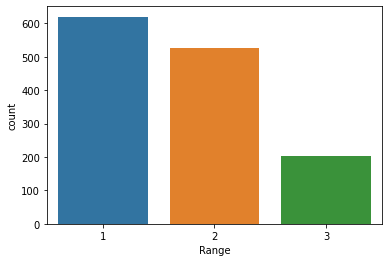

In [17]:
sns.countplot(x = data_train["Range"])

## 데이터셋 X, Y 나누기

pd.get_dummies를 통해 Gender feature에 one hot encoding을 적용해줍니다.

In [18]:
data_test = pd.get_dummies(data_test)
data_test.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Gender_F,Gender_I,Gender_M
0,0.595,0.470,0.155,0.6065,0.4515,0.1780,0.1550,1,0,0
1,0.580,0.450,0.150,0.6360,0.2760,0.1815,0.3600,0,0,1
2,0.260,0.205,0.070,0.0720,0.0415,0.0190,0.0305,0,1,0
3,0.590,0.460,0.130,0.7850,0.4550,0.2055,0.3300,0,0,1
4,0.595,0.465,0.140,0.8225,0.5175,0.2440,0.3050,1,0,0


In [19]:
data_train = pd.get_dummies(data_train)
data_train.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target,Range,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,15,3,0,0,1
1,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,8,1,0,1,0
2,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,18,3,0,1,0
3,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,13,2,0,0,1
4,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,6,1,0,1,0


In [20]:
data_train_X = data_train.drop(columns = ['Target'], axis = 1)
data_train_X.head()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Range,Gender_F,Gender_I,Gender_M
0,0.605,0.470,0.115,0.7025,0.3925,0.2910,0.3100,3,0,0,1
1,0.430,0.315,0.095,0.2795,0.1750,0.0800,0.1045,1,0,1,0
2,0.580,0.490,0.195,0.9405,0.5305,0.2540,0.4100,3,0,1,0
3,0.535,0.405,0.175,0.8850,0.5480,0.3265,0.3370,2,0,0,1
4,0.310,0.235,0.090,0.0880,0.0480,0.0310,0.0400,1,0,1,0


In [21]:
data_train_y = data_train['Target']
data_train_y.head()

0    15
1     8
2    18
3    13
4     6
Name: Target, dtype: int64

# 모델 생성 및 학습하기

MLP + NGB + XGB + CATBOOST 4가지 모델 soft 앙상블하였습니다.

Hyperparameter Tuning은 아직 진행 중입니다.

참고로 CATBOOST가 학습시간이 좀 걸립니다.

In [22]:
def NMAE(true, pred):
    score = np.mean(np.abs(true - pred) / true)
    return score

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor


skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) #총 15번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']):
    n += 1
    
    val_pred_name = [] #validation pred model 이름 저장
    val_pred = []      #validation set pred 결과 저장
    target_pred = []   #test set pred 결과 저장
    
    train_X = np.array(data_train_X.drop("Range", axis = 1)) #분배된 학습을 위해 만들어둔 Range feature 제거
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    ### Create Model ###
    
    ###모델을 생성하고 집어넣으면 됩니다.
    
    ### MLPRegressor ###
    model = MLPRegressor(random_state = 42, activation = 'tanh')
    model.fit(X_train, y_train) # 모델 학습
    
    val_pred_name.append("MLPRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### NGBRegressor ###
    model = NGBRegressor(random_state = 42, verbose = 0)
    model.fit(X_train, y_train)
    
    val_pred_name.append("NGBRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### XGBRegressor ###
    model = XGBRegressor(random_state = 42,)
    model.fit(X_train, y_train)
    
    val_pred_name.append("XGBRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### CatBoostRegressor ###
    model = CatBoostRegressor(iterations = 1000, verbose = 0, task_type="GPU", random_state = 42)
    model.fit(X_train, y_train)
    
    val_pred_name.append("CatBoostRegressor")      # 모델 이름 저장
    val_pred.append(model.predict(X_valid))   # validation set pred 결과 저장
    target_pred.append(model.predict(X_test)) # test set pred 결과 저장
    
    ### voting ###
    
    ### average validation pred ###
    preds = np.array(val_pred[0])
    for i in range(1, len(val_pred)):
        preds += val_pred[i]
    
    preds = preds/len(val_pred)
    
    ### average target pred ###
    target_preds = np.array(target_pred[0])
    for i in range(1, len(target_pred)):
        target_preds += target_pred[i]
    
    target_preds = target_preds/len(target_pred)
    
    fold_target_pred.append(target_preds) # append final target pred
    
    print("========== fold %d ==========" %(n))
    for i in range(len(val_pred)):
        print("%s model NMAE : %0.4f" %(val_pred_name[i], NMAE(y_valid, val_pred[i].astype(int))))
        
    print("==============================")
    print("Average NMAE %0.4f" %(NMAE(y_valid, preds.astype(int))))
    print("")

========== fold 1 ==========
MLPRegressor model NMAE : 0.1557
NGBRegressor model NMAE : 0.1616
XGBRegressor model NMAE : 0.1521
CatBoostRegressor model NMAE : 0.1531
Average NMAE 0.1515

========== fold 2 ==========
MLPRegressor model NMAE : 0.1465
NGBRegressor model NMAE : 0.1486
XGBRegressor model NMAE : 0.1480
CatBoostRegressor model NMAE : 0.1368
Average NMAE 0.1382

========== fold 3 ==========
MLPRegressor model NMAE : 0.1483
NGBRegressor model NMAE : 0.1442
XGBRegressor model NMAE : 0.1455
CatBoostRegressor model NMAE : 0.1467
Average NMAE 0.1341

========== fold 4 ==========
MLPRegressor model NMAE : 0.1563
NGBRegressor model NMAE : 0.1472
XGBRegressor model NMAE : 0.1432
CatBoostRegressor model NMAE : 0.1390
Average NMAE 0.1377

========== fold 5 ==========
MLPRegressor model NMAE : 0.1530
NGBRegressor model NMAE : 0.1467
XGBRegressor model NMAE : 0.1591
CatBoostRegressor model NMAE : 0.1537
Average NMAE 0.1430

========== fold 6 ==========
MLPRegressor model NMAE : 0.1447
NGB

In [30]:
np.array(fold_target_pred).shape

(10, 2924)

# 제출하기

In [31]:
### average target pred ###
final_pred = np.array(fold_target_pred[0])
for i in range(1, len(fold_target_pred)):
    final_pred += fold_target_pred[i]

final_pred = final_pred/len(fold_target_pred)
final_pred = final_pred.astype(int)

In [32]:
submission = pd.read_csv("./sample_submission.csv")
submission.head()

,id,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [33]:
submission['Target'] = final_pred
submission.head()

,id,Target
0,1,8
1,2,13
2,3,5
3,4,11
4,5,10


In [34]:
submission.to_csv("Submit_4.csv",index=False)